# Tarea 1: Cargar Imagen


## Importamos Librerias Necesarias
  - cv2: Procesamiento de Imágenes
  - Numpy: Manejo de funciones científicas
  - Matplotlib: Graficación

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Cargamos la Imagen
Cargamos la imagen objetivo utilizando `opencv`. Aun si el path a la imagen es incorrecto este comando se ejecuta aunque el tipo de la variable `img` sera `Nonetype`.

In [2]:
img = cv2.imread(r'./imagenes/unam.jpg', 0)

In [3]:
type(img)

numpy.ndarray

## Mostrar Imagen
A continuacion, mostramos la imagen que fue cargada en la variable `img`.existen dos maneras de mostrar las imagenes en un Jupyter Notebook. La primera es cargar la imagen en una ventana adicional a la del navegador:

In [4]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

La segunda manera de mostrar la imagen es utilizar `matplotlib` para mostrar la imagen en el NoteBook directamente:

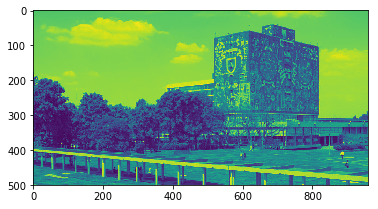

In [5]:
plt.imshow(img)
plt.show()

La imagen anterior ha sido cargada correctamente pero el color de los pixeles han sido cambiado ya que `openCV` trabaja en BGR y `matplotlib` en RGB. Para ajustarlos a RGB por lo que tenemos que hacerle un tratamiento adicional para ver los colores de la imagen original. Para hacer esto usaremos `cv2.cvtColor()` en todo el arreglo de pixeles de la imagen.

En este caso tendremos que hacer el cambio de BGR -> RGB pasando la bandera `cv2.COLOR_BGR2RGB`

In [6]:
destRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

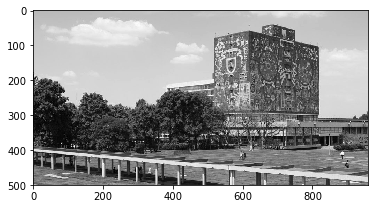

In [7]:
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()

## Modificar Imagen
En este caso mostraremosm la iluminacion que tiene la imagen en cada pixel:

In [ ]:
lum_img = destRGB[:, :, 0]
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')
plt.colorbar()
plt.show()

### Ruido Gaussiano
Ahora agremas ruido gaussiano a la imagen original y la imprimimos en blanco y negro. Para esto, se usa kernel gaussiano. Se hace con la función, `cv2.GaussianBlur()`. Deberemos especificar el ancho y alto del kernel, que debería ser positivo e impar. También deberemos especificar la desviación estándar en la dirección X e Y, sigmaX y sigmaY, respectivamente. Si solo se especifica sigmaX, sigmaY se toma como lo mismo que sigmaX. Si ambos se dan como ceros, se calculan a partir del tamaño del kernel. El desenfoque gaussiano es altamente efectivo para eliminar el ruido gaussiano de la imagen. [1]

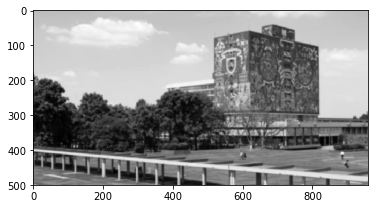

In [9]:
blur = cv2.GaussianBlur(img,(9,9),0)
plt.imshow(blur, cmap=plt.get_cmap('gray'))
plt.show()

### Filtro Sovel

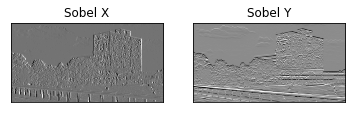

In [10]:
sobelx = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(121),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

## Guardar Imagen
Para guardar la imagen podemos usar el comando `imwrite()`

In [ ]:
cv2.imwrite(r'./imagenes/unam_ilum.png',lum_img)

## Referencias
1. OpenCV, _GaussianBlur_; https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html
2. OpenCv, _Image Gradients_; https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_gradients/py_gradients.html